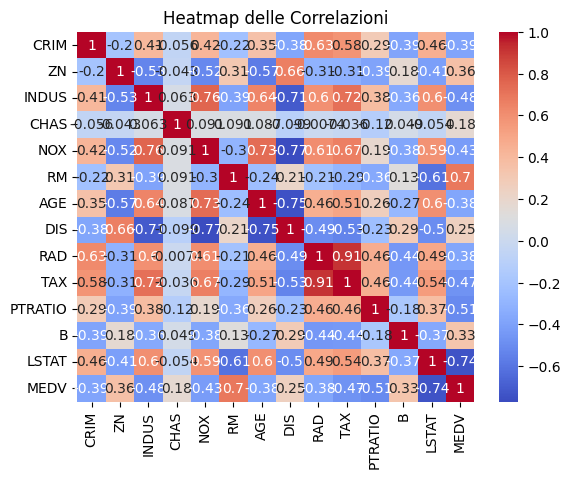

MAE (errore assoluto medio): 4.97
RMSE (errore quadratico medio): 6.58


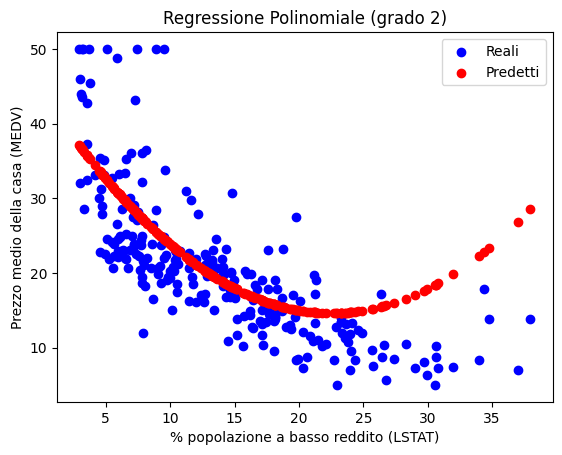

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

# STEP 1: Caricamento del dataset (da seaborn o da CSV)
url = "C:/Users/giann/Documents/GitHub/Bostonshouse/boston.csv"
df = pd.read_csv(url)

# STEP 2: Analisi di correlazione
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap delle Correlazioni")
plt.show()

# STEP 3: Selezione della feature più correlata (negativamente) con MEDV
# Qui scegliamo 'LSTAT' che ha alta correlazione negativa
X = df[['LSTAT']].values   # input (2D)
y = df['MEDV'].values      # target

# STEP 4: Divisione 50% training e 50% test
split_index = len(X) // 2
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# STEP 5: Creazione modello di regressione polinomiale (grado 2 o 3)
poly = PolynomialFeatures(degree=2)  # grado 2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# STEP 6: Predizione e valutazione
y_pred = model.predict(X_test_poly)

# Calcolo errori
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE (errore assoluto medio): {mae:.2f}")
print(f"RMSE (errore quadratico medio): {rmse:.2f}")

# STEP 7: Visualizzazione della curva di regressione
plt.scatter(X_test, y_test, color='blue', label='Reali')
plt.scatter(X_test, y_pred, color='red', label='Predetti')
plt.xlabel('% popolazione a basso reddito (LSTAT)')
plt.ylabel('Prezzo medio della casa (MEDV)')
plt.title('Regressione Polinomiale (grado 2)')
plt.legend()
plt.show()
